In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

In [88]:
df = pd.read_csv("Datasets/pdb_data_seq.csv")

In [89]:
df.head()

,structureId,chainId,sequence,residueCount,macromoleculeType
0,100D,A,CCGGCGCCGG,20,DNA/RNA Hybrid
1,100D,B,CCGGCGCCGG,20,DNA/RNA Hybrid
2,101D,A,CGCGAATTCGCG,24,DNA
3,101D,B,CGCGAATTCGCG,24,DNA
4,101M,A,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...,154,Protein


In [90]:
df.shape

(467304, 5)

In [91]:
df.isna().sum()

structureId              0
chainId                 10
sequence                28
residueCount             0
macromoleculeType    34817
dtype: int64

In [92]:
df.dropna(inplace=True)

In [93]:
df.shape

(432474, 5)

In [95]:
sequences = df["sequence"].to_numpy()
chars = []

In [97]:
for s in sequences:
    for c in s:
        if c not in chars:
            chars.append(c)

In [99]:
chars.sort()

In [100]:
chars

['A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z']

In [101]:
df[df["macromoleculeType"]=="DNA/RNA Hybrid"]

,structureId,chainId,sequence,residueCount,macromoleculeType
0,100D,A,CCGGCGCCGG,20,DNA/RNA Hybrid
1,100D,B,CCGGCGCCGG,20,DNA/RNA Hybrid
13,104D,A,CGCGTATACGCG,24,DNA/RNA Hybrid
14,104D,B,CGCGTATACGCG,24,DNA/RNA Hybrid
216,161D,A,CCGGCGCCGG,20,DNA/RNA Hybrid
...,...,...,...,...,...
440688,5T5A,A,GCAGGGCAAGGCCCAGUCCCGUGCAAGCCGGGACCGCCCCGGGGCG...,62,DNA/RNA Hybrid
442563,5TGG,A,TAAAAAAAA,18,DNA/RNA Hybrid
442564,5TGG,B,TAAAAAAAA,18,DNA/RNA Hybrid
452862,5VXQ,A,AAAAAAAAAAA,22,DNA/RNA Hybrid


In [59]:
print(len(df["macromoleculeType"].unique()))
classes = df["macromoleculeType"].unique()
print(classes)

13
['DNA/RNA Hybrid' 'DNA' 'Protein' 'Protein#DNA' 'DNA#RNA' 'RNA'
 'DNA#DNA/RNA Hybrid' 'Protein#RNA' 'RNA#DNA/RNA Hybrid'
 'Protein#DNA/RNA Hybrid' 'Protein#DNA#RNA' 'Protein#DNA#DNA/RNA Hybrid'
 'Protein#RNA#DNA/RNA Hybrid']


In [60]:
for c in classes:
    print(c, "-------->" ,df[df["macromoleculeType"]==c].shape[0])

DNA/RNA Hybrid --------> 141
DNA --------> 3784
Protein --------> 345175
Protein#DNA --------> 21303
DNA#RNA --------> 121
RNA --------> 2389
DNA#DNA/RNA Hybrid --------> 26
Protein#RNA --------> 56219
RNA#DNA/RNA Hybrid --------> 74
Protein#DNA/RNA Hybrid --------> 68
Protein#DNA#RNA --------> 2712
Protein#DNA#DNA/RNA Hybrid --------> 159
Protein#RNA#DNA/RNA Hybrid --------> 303


In [61]:
df["chainId"].unique()

array(['A', 'B', 'C', ..., 'z7', 'z8', 'z9'], dtype=object)

In [62]:
df["sequence"][100]

'MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAKSELDKAIGRNTNGVITKDEAEKLFNQDVDAATRGILRNAKLKPVYDSLDAVRRAALINMVFQMGETGVAGFTNSLRMLQQKRWDEAAVNLAKSRWYNQTPNRAKRVITTFRTGTWDAYKNL'

<Axes: xlabel='macromoleculeType'>

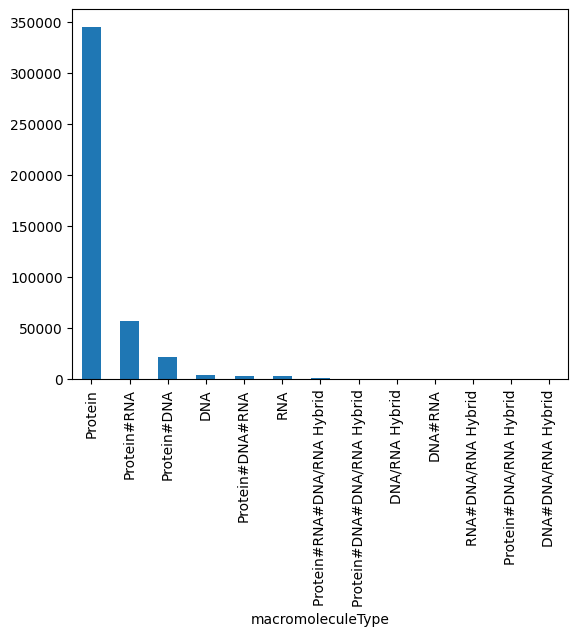

In [63]:
df['macromoleculeType'].value_counts().plot(kind='bar')

In [64]:
encoder = LabelEncoder()

In [65]:
df["sequence"] = encoder.fit_transform(df["sequence"])

In [66]:
df

,structureId,chainId,sequence,residueCount,macromoleculeType
0,100D,A,9178,20,DNA/RNA Hybrid
1,100D,B,9178,20,DNA/RNA Hybrid
2,101D,A,9635,24,DNA
3,101D,B,9635,24,DNA
4,101M,A,80596,154,Protein
...,...,...,...,...,...
467299,9XIA,A,68952,388,Protein
467300,9XIM,A,96151,1572,Protein
467301,9XIM,B,96151,1572,Protein
467302,9XIM,C,96151,1572,Protein


In [67]:
df["macromoleculeType"] = encoder.fit_transform(df["macromoleculeType"])

In [68]:
df

,structureId,chainId,sequence,residueCount,macromoleculeType
0,100D,A,9178,20,3
1,100D,B,9178,20,3
2,101D,A,9635,24,0
3,101D,B,9635,24,0
4,101M,A,80596,154,4
...,...,...,...,...,...
467299,9XIA,A,68952,388,4
467300,9XIM,A,96151,1572,4
467301,9XIM,B,96151,1572,4
467302,9XIM,C,96151,1572,4


In [69]:
df["structureId"] = encoder.fit_transform(df["structureId"])
df["chainId"] = encoder.fit_transform(df["chainId"])

In [70]:
df

,structureId,chainId,sequence,residueCount,macromoleculeType
0,0,583,9178,20,3
1,0,701,9178,20,3
2,1,583,9635,24,0
3,1,701,9635,24,0
4,2,583,80596,154,4
...,...,...,...,...,...
467299,137181,583,68952,388,4
467300,137182,583,96151,1572,4
467301,137182,701,96151,1572,4
467302,137182,819,96151,1572,4


In [71]:
df.corr()

,structureId,chainId,sequence,residueCount,macromoleculeType
structureId,1.000000,0.160756,0.020529,0.101744,0.224929
chainId,0.160756,1.000000,0.041415,0.209549,0.202599
sequence,0.020529,0.041415,1.000000,0.091405,0.023955
residueCount,0.101744,0.209549,0.091405,1.000000,0.161376
macromoleculeType,0.224929,0.202599,0.023955,0.161376,1.000000


In [72]:
df = shuffle(df, random_state=10)

In [73]:
df

,structureId,chainId,sequence,residueCount,macromoleculeType
182591,68029,308,83705,313236,4
283452,96769,583,3942,204,4
359139,110485,1337,12139,1347,4
109938,43227,583,54853,163,4
342010,108606,647,69895,22204,9
...,...,...,...,...,...
114134,46008,701,51809,822,4
101527,39327,583,69058,492,4
391292,119025,583,53551,103,4
261317,89495,701,74960,452,4


In [74]:
df.reset_index(inplace=True)
df.drop(columns=["index"], inplace=True)
df

,structureId,chainId,sequence,residueCount,macromoleculeType
0,68029,308,83705,313236,4
1,96769,583,3942,204,4
2,110485,1337,12139,1347,4
3,43227,583,54853,163,4
4,108606,647,69895,22204,9
...,...,...,...,...,...
432469,46008,701,51809,822,4
432470,39327,583,69058,492,4
432471,119025,583,53551,103,4
432472,89495,701,74960,452,4


In [75]:
dfSample = df.iloc[:100, :]

In [76]:
dfSample

,structureId,chainId,sequence,residueCount,macromoleculeType
0,68029,308,83705,313236,4
1,96769,583,3942,204,4
2,110485,1337,12139,1347,4
3,43227,583,54853,163,4
4,108606,647,69895,22204,9
...,...,...,...,...,...
95,120258,583,74140,2780,9
96,55502,884,85075,2120,4
97,52626,1192,79963,3760,4
98,7049,701,47251,1182,4


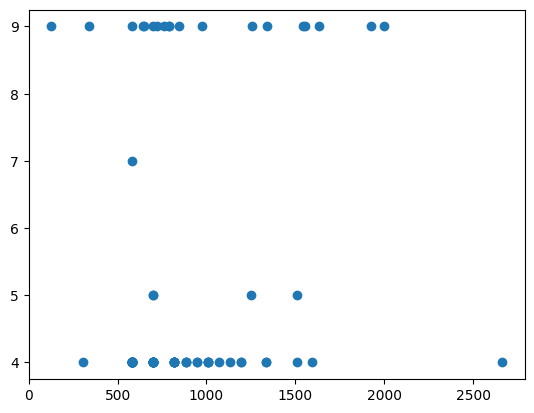

In [78]:
plt.scatter(dfSample["chainId"], dfSample["macromoleculeType"])

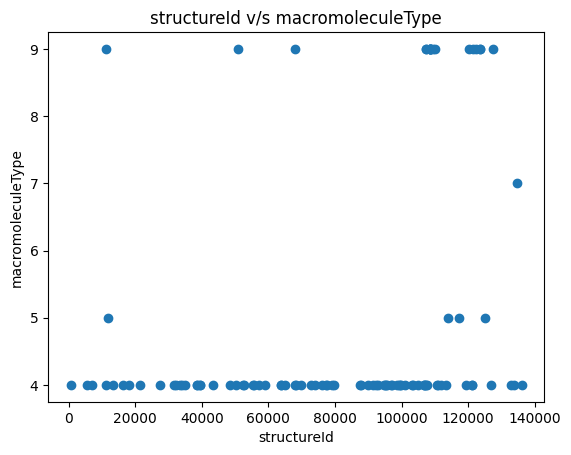

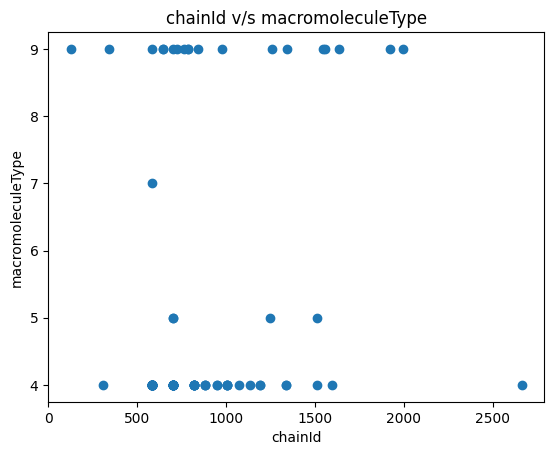

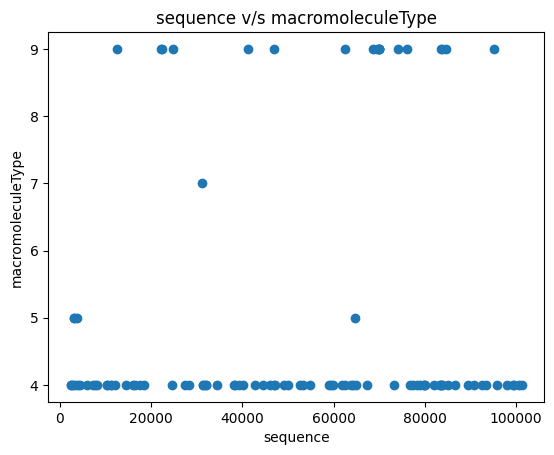

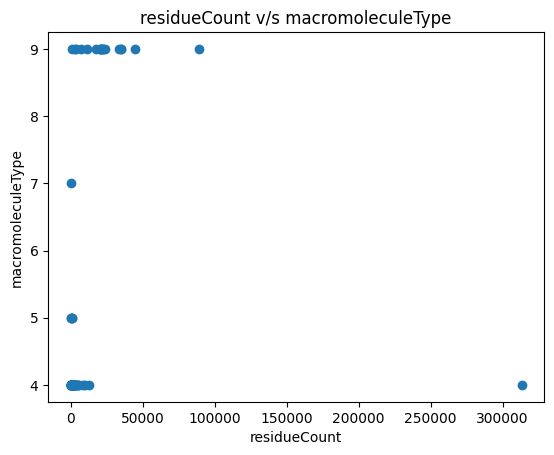

In [84]:
for col in dfSample.columns[:-1]:
    plt.scatter(dfSample[col], dfSample["macromoleculeType"])
    plt.xlabel(col)
    plt.ylabel("macromoleculeType")
    plt.title(col+" v/s macromoleculeType")
    plt.show()

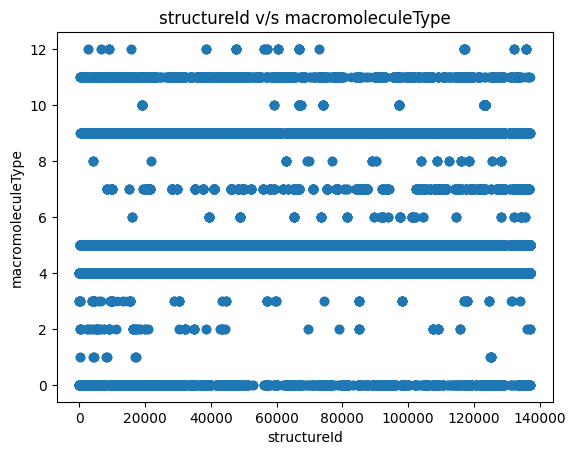

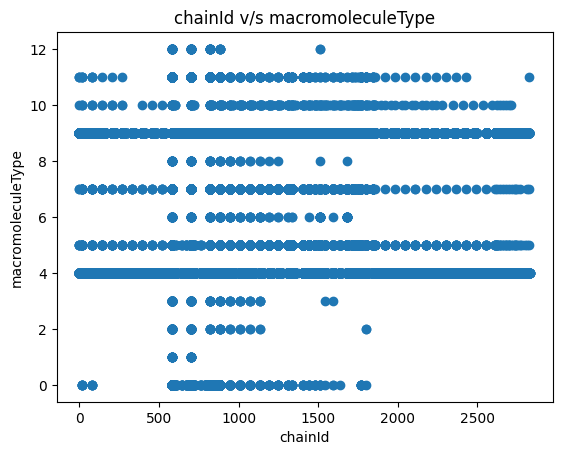

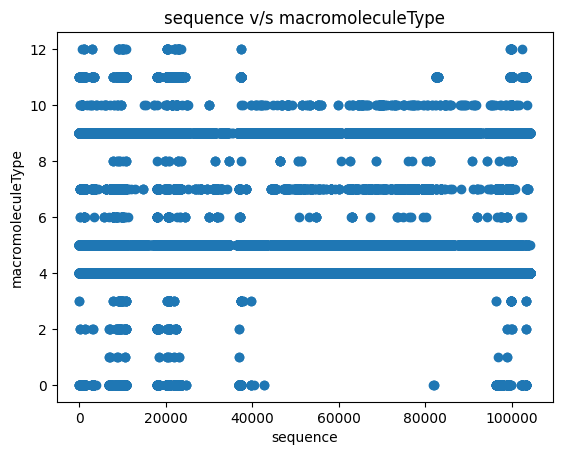

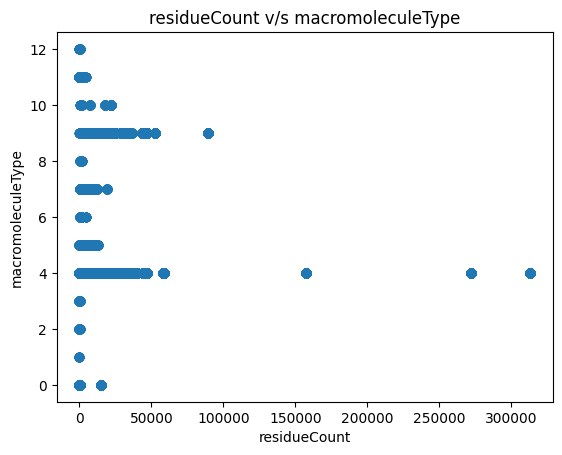

In [85]:
for col in df.columns[:-1]:
    plt.scatter(df[col], df["macromoleculeType"])
    plt.xlabel(col)
    plt.ylabel("macromoleculeType")
    plt.title(col+" v/s macromoleculeType")
    plt.show()